In [1]:
#import module and read file
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon, MultiPolygon
import numpy as np

regions = gpd.read_file('SuomenMaakuntajako_2018_10k.shp')

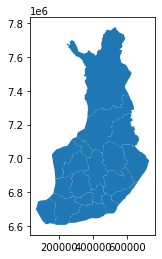

In [2]:
#plot map to check
regions.plot()

In [3]:
#read csv files of visitor data
allvisitors = pd.read_csv('allvisitors_seasons.csv', sep= ';')
finnish = pd.read_csv('finnishvisitors_seasons.csv', sep= ';')
foreign = pd.read_csv('foreignvisitors_seasons.csv', sep= ';')

In [4]:
#create list from region codes
NATCODE = ['01', '02', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16',
     '17','18', '19','21']

In [5]:
#add region codes as a column to the csv files. (The regions on the csv files are in region code order.
#This done was done when editing the csv files themselves) 
allvisitors['NATCODE'] = NATCODE
finnish['NATCODE'] = NATCODE
foreign['NATCODE'] = NATCODE

In [6]:
# check files, ID & NATCODE should be the same
print(allvisitors)
#print(finnish)
#print(foreign)

                Region               Landskap  ID  2017_Aut  2017_18_Win  \
0             Uusimaa                  Nyland   1   1040469      1347355   
1      Varsinais-Suomi      Egentliga Finland   2    176299       201291   
2            Satakunta              Satakunta   4     55105        63365   
3          Kanta-Hame    Egentliga Tavastland   5     61663        69472   
4           Pirkanmaa               Birkaland   6    241737       292228   
5          Paijat-Hame    Paijanne-Tavastland   7     77509       117139   
6          Kymenlaakso           Kymmenedalen   8     45298        42341   
7        Etela-Karjala          Sodra Karelen   9     98724       139869   
8           Etela-Savo          Sodra Savolax  10     67985        93257   
9         Pohjois-Savo          Norra Savolax  11    114451       183856   
10     Pohjois-Karjala          Norra Karelen  12     60723        79808   
11         Keski-Suomi      Mellersta Finland  13    126537       235812   
12     Etela

In [7]:
#merge csv files and shapefile
allvisitorsgeo = regions.merge(allvisitors, on='NATCODE')
finnishgeo = regions.merge(finnish, on='NATCODE')
foreigngeo = regions.merge(foreign, on='NATCODE')

In [8]:
#save shapefiles
allvisitorsgeo.to_file("allvisitors_official.shp")
finnishgeo.to_file("finnish_official.shp")
foreigngeo.to_file("foreign_official.shp")